<a href="https://colab.research.google.com/github/bahramzada/Bina.az-RealEstate-Analysis/blob/main/Baku_Apartment_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

In [17]:
!curl -L -o apartment-prices-for-azerbaijan-market.zip https://www.kaggle.com/api/v1/datasets/download/azadshahvaladov/apartment-prices-for-azerbaijan-market

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  378k  100  378k    0     0   346k      0  0:00:01  0:00:01 --:--:-- 1714k


In [18]:
!unzip '/content/apartment-prices-for-azerbaijan-market.zip'

Archive:  /content/apartment-prices-for-azerbaijan-market.zip
  inflating: BakuApartmentData.csv   


In [19]:
df = pd.read_csv('/content/BakuApartmentData.csv')

In [20]:
df

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage
0,0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1
1,1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1
2,2,755000,Səbail r.,4,210.0,7/18,1,1,1,1
3,3,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1
4,4,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
39297,39297,85500,9-cu mikrorayon q.,2,45.0,9/9,0,0,1,0
39298,39298,102500,Memar Əcəmi m.,2,48.0,3/5,0,0,1,0
39299,39299,143500,İnşaatçılar m.,3,65.0,3/5,0,0,1,0
39300,39300,172000,Elmlər Akademiyası m.,4,90.0,3/5,0,0,1,0


In [21]:
# 'floor' sütunu "məsələn 5/12" şəklindədirsə, onu iki sütuna ayırırıq: cari mərtəbə və ümumi mərtəbə sayı
# Splitting the 'floor' column (e.g. "5/12") into two new columns: current floor and total number of floors
df[['current_floor', 'total_floor']] = df['floor'].astype(str).str.split('/', expand=True)

# Ayrılan mərtəbə sütunlarını ədədi formata çeviririk (NaN-lar üçün errors='coerce' istifadə olunur)
# Converting the extracted floor columns to numeric type (using 'coerce' to handle missing or invalid values)
df['current_floor'] = pd.to_numeric(df['current_floor'], errors='coerce')
df['total_floor'] = pd.to_numeric(df['total_floor'], errors='coerce')


In [22]:
df

,Unnamed: 0,price,location,rooms,square,floor,new_building,has_repair,has_bill_of_sale,has_mortgage,current_floor,total_floor
0,0,284000,Azadlıq Prospekti m.,3,140.0,5/12,1,1,1,1,5,12
1,1,355000,Şah İsmayıl Xətai m.,3,135.0,19/20,1,1,1,1,19,20
2,2,755000,Səbail r.,4,210.0,7/18,1,1,1,1,7,18
3,3,245000,Elmlər Akademiyası m.,3,86.0,8/10,1,1,1,1,8,10
4,4,350000,Elmlər Akademiyası m.,4,174.0,12/15,1,1,1,1,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...
39297,39297,85500,9-cu mikrorayon q.,2,45.0,9/9,0,0,1,0,9,9
39298,39298,102500,Memar Əcəmi m.,2,48.0,3/5,0,0,1,0,3,5
39299,39299,143500,İnşaatçılar m.,3,65.0,3/5,0,0,1,0,3,5
39300,39300,172000,Elmlər Akademiyası m.,4,90.0,3/5,0,0,1,0,3,5


In [23]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{column} overliers: {lower_bound:.2f} - {upper_bound:.2f}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Price üçün outlier-ləri silinir
df = remove_outliers_iqr(df, 'price')

# Square üçün də təmizlənir
df = remove_outliers_iqr(df, 'square')

# Rooms üçün də
df = remove_outliers_iqr(df, 'rooms')


price overliers: -78000.00 - 490000.00
square overliers: -25.00 - 215.00
rooms overliers: 0.50 - 4.50


In [25]:
from sklearn.model_selection import train_test_split

# Train və test dəstələrinə bölmə
# Splitting the dataset into train and test sets
X = df.drop(columns=['price', 'floor'])  # 'floor' artıq 'current_floor' və 'total_floor' olaraq ayrılıb
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train set üzərində location üzrə orta qiymətləri hesablayırıq
# Calculating average price per location using only the training set (to prevent data leakage)
location_mean = X_train.copy()
location_mean['price'] = y_train
location_price_map = location_mean.groupby('location')['price'].mean()

# Train və test setlərinə location-encoded sütununu tətbiq edirik
# Mapping the average location prices to both train and test sets
X_train['location_encoded'] = X_train['location'].map(location_price_map)
X_test['location_encoded'] = X_test['location'].map(location_price_map)

# Artıq kategorik 'location' sütunu model üçün çıxarılır
# Dropping the original categorical 'location' column as it's now numerically encoded
X_train = X_train.drop(columns=['location'])
X_test = X_test.drop(columns=['location'])




> 🔴(EN) Since the location column is categorical, it must be converted into a numerical format. Using Mean Encoding, we calculate the average property price for each location and assign that value to all corresponding rows. This method preserves the economic meaning of the data while avoiding the complexity of one-hot encoding and maintaining model simplicity.



> 🔴(AZ) Məkan (location) sütunu kategorik olduğu üçün onu sayısal formata çevirmək lazımdır. Mean Encoding üsulu ilə hər bir məkan üçün orta qiymət (price) hesablanır və həmin ədədi dəyər modelə ötürülür. Bu metod həm məlumatın iqtisadi mənasını saxlayır, həm də sütun sayını artırmadan sadə və effektiv nəticə verir.





In [26]:
from sklearn.ensemble import RandomForestRegressor

# Modelin yaradılması
# Creating the model
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)

# Modelin öyrədilməsi (train set üzərində)
# Fitting the model on the training data
model.fit(X_train, y_train)

# Test set üçün proqnozların alınması
# Predicting on the test set
preds = model.predict(X_test)


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Orta səhv (AZN cinsində)
# Mean Absolute Error
mae = mean_absolute_error(y_test, preds)

# Kök ortalama kvadrat səhv (Root Mean Squared Error)
# Root Mean Squared Error
mse = mean_squared_error(y_test, preds) # squared parametri olmadan MSE hesablanır
rmse = np.sqrt(mse)

# R^2 skor (Modelin nə qədər izah etdiyini göstərir)
# R-squared Score
r2 = r2_score(y_test, preds)

print(f"MAE: {mae:.2f} AZN")
print(f"RMSE: {rmse:.2f} AZN")
print(f"R² Score: {r2:.3f}")


MAE: 18435.44 AZN
RMSE: 28945.14 AZN
R² Score: 0.897


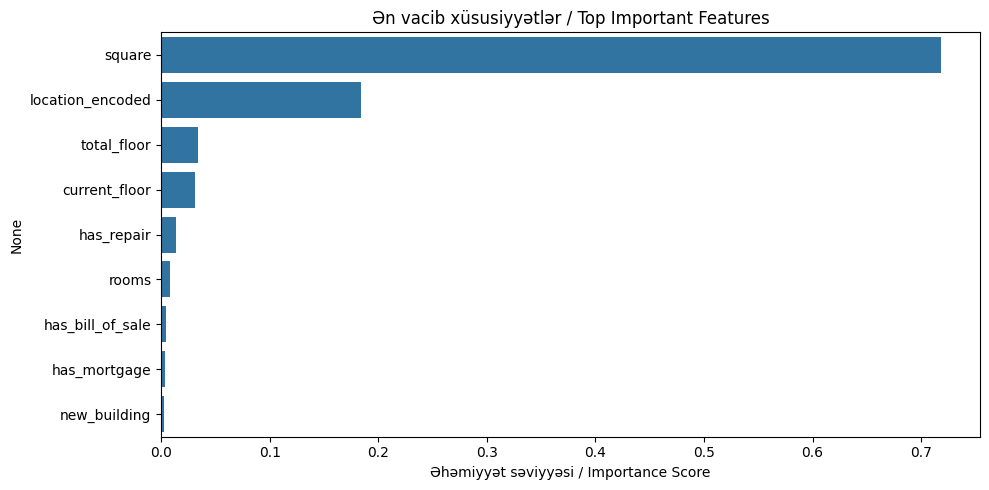

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Xüsusiyyətlərin modeldəki əhəmiyyət səviyyəsi
# Feature importance from the trained model
importances = model.feature_importances_
features = X_train.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Ən vacib xüsusiyyətlər / Top Important Features")
plt.xlabel("Əhəmiyyət səviyyəsi / Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300,400],
    'max_depth': [20,25,30],
    'min_samples_split': [2],
    'min_samples_leaf': [2,4,6]
}
# Model obyekti
rf = RandomForestRegressor(random_state=42)

# GridSearch qurulur
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,       # Paralel işləsin
                           scoring='neg_root_mean_squared_error',  # RMSE əsaslı
                           verbose=1)

# Təlim
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# Ən yaxşı hiperparametrləri çap et
print("Best parameters found:", grid_search.best_params_)

# Ən yaxşı modeli əldə et
best_model = grid_search.best_estimator_

# Test üzərində qiymətləndir
preds = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, preds)

# Kök ortalama kvadrat səhv (Root Mean Squared Error)
# Root Mean Squared Error
mse = mean_squared_error(y_test, preds) # squared parametri olmadan MSE hesablanır
rmse = np.sqrt(mse)

# R^2 skor (Modelin nə qədər izah etdiyini göstərir)
# R-squared Score
r2 = r2_score(y_test, preds)

print(f"MAE: {mae:.2f} AZN")
print(f"RMSE: {rmse:.2f} AZN")
print(f"R² Score: {r2:.3f}")

